#제품 이상여부 판별 프로젝트

##1. 데이터 불러오기

###필수 라이브러리

In [2]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# 그래프 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###데이터 읽어오기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ROOT_DIR = "/content/drive/MyDrive/Colab Notebooks/Data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"),encoding='latin-1')
train_data

,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION ¥È Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE STANDBY POSITION X Collect Result_Dam,CURE STANDBY POSITION Z Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Z Collect Result_Dam,CURE START POSITION ¥È Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,240,2.5,-90,100,1150,33.5,1030,33.5,-90,16,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,240,2.5,-90,70,1150,33.5,1030,33.5,-90,10,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,1000,12.5,90,85,1150,33.5,280,33.5,90,16,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,1000,12.5,90,70,1150,33.5,280,33.5,90,10,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,240,2.5,-90,70,1150,33.5,1030,33.5,-90,10,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,240,2.5,-90,70,1150,33.5,1030,33.5,-90,10,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,1000,12.5,90,100,1150,33.5,280,33.5,90,16,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,240,2.5,-90,100,1150,33.5,1030,33.5,-90,16,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,1000,12.5,90,70,1150,33.5,280,33.5,90,10,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [6]:
columns_df = train_data.columns
pd.set_option('display.max_seq_items', None)
columns_df

Index(['CURE END POSITION X Collect Result_Dam',
       'CURE END POSITION Z Collect Result_Dam',
       'CURE END POSITION ¥È Collect Result_Dam',
       'CURE SPEED Collect Result_Dam',
       'CURE STANDBY POSITION X Collect Result_Dam',
       'CURE STANDBY POSITION Z Collect Result_Dam',
       'CURE START POSITION X Collect Result_Dam',
       'CURE START POSITION Z Collect Result_Dam',
       'CURE START POSITION ¥È Collect Result_Dam',
       'DISCHARGED SPEED OF RESIN Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
       'Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
       'HEAD NORMA

##오버샘플링

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 타깃 열에서 'AbNormal' 값을 'AbNormal'로 유지하고, 나머지 값을 'Normal'로 수정
y_train = train_data['target'].apply(lambda x: 'AbNormal' if x == 'AbNormal' else 'Normal')

# X_train은 타깃 열을 제외한 나머지 열로 구성
X_train = train_data.drop(columns='target')

# 숫자가 아닌 열을 찾아서 레이블 인코딩 적용
label_encoder = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])

# SMOTE를 사용하여 오버샘플링을 수행합니다.
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 오버샘플링된_데이터 합치기
df_concat = pd.concat([X_train_smote, y_train_smote], axis=1)
df_concat

#count
df_normal = df_concat[df_concat["target"] == "Normal"]
df_abnormal = df_concat[df_concat["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

  Total: Normal: 38156, AbNormal: 38156


##ADASYN

In [9]:
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder


# 타깃 열에서 'AbNormal' 값을 'AbNormal'로 유지하고, 나머지 값을 'Normal'로 수정
y_train = train_data['target'].apply(lambda x: 'AbNormal' if x == 'AbNormal' else 'Normal')

# X_train은 타깃 열을 제외한 나머지 열로 구성
X_train = train_data.drop(columns='target')

# 숫자가 아닌 열을 찾아서 레이블 인코딩 적용
label_encoder = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# 오버샘플링된_데이터 합치기
df_concat = pd.concat([X_train_adasyn, y_train_adasyn], axis=1)
df_concat

#count
df_normal = df_concat[df_concat["target"] == "Normal"]
df_abnormal = df_concat[df_concat["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

  Total: Normal: 38156, AbNormal: 37864


##SMOTE-Tomek

In [19]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 타깃 열에서 'AbNormal' 값을 'AbNormal'로 유지하고, 나머지 값을 'Normal'로 수정
y_train = train_data['target'].apply(lambda x: 'AbNormal' if x == 'AbNormal' else 'Normal')

# X_train은 타깃 열을 제외한 나머지 열로 구성
X_train = train_data.drop(columns='target')

# 숫자가 아닌 열을 찾아서 레이블 인코딩 적용
label_encoder = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_tomek, y_train_tomek = smoteto.fit_resample(X_train, y_train)

# 오버샘플링된_데이터 합치기
df_concat = pd.concat([X_train_tomek, y_train_tomek], axis=1)
df_concat

#count
df_normal = df_concat[df_concat["target"] == "Normal"]
df_abnormal = df_concat[df_concat["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

  Total: Normal: 38156, AbNormal: 37084


###데이터 분할

In [20]:
df_train, df_val = train_test_split(
    df_concat,
    test_size=0.3,
    stratify=df_concat["target"],
    random_state=RANDOM_STATE,
)

# Further split the training set into train and validation sets if needed
X_train, X_val, y_train, y_val = train_test_split(
    df_train.drop(columns='target'),
    df_train['target'],
    test_size=0.3,  # Adjust validation size as needed
    random_state=156
)

def print_stats(df: pd.DataFrame):
    num_normal = len(df[df["target"] == "Normal"])
    num_abnormal = len(df[df["target"] == "AbNormal"])
    print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}" + f" ratio: {num_abnormal/num_normal}")

# Print statistics
print(f"  \tAbnormal\tNormal")
print_stats(df_train)
print_stats(df_val)

  	Abnormal	Normal
  Total: Normal: 26709, AbNormal: 25959 ratio: 0.9719195776704481
  Total: Normal: 11447, AbNormal: 11125 ratio: 0.9718703590460382


#3. 모델 학습

##GBM

In [21]:
# GBM 수행 시간 측정
start_time = time.time()

# 모델 설정
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)

# GBM 학습 및 예측 성능 평가
gb_pred = gb_clf.predict(X_val)
gb_accuracy = accuracy_score(y_val, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

# 더 많은 성능지표를 보기 위한 라이브러리 설치
from sklearn.metrics import precision_score, recall_score

gb_precision = precision_score(y_val, gb_pred, pos_label='AbNormal')  # Specify 'AbNormal' as the positive label
gb_recall = recall_score(y_val, gb_pred, pos_label='AbNormal')  # Same for recall
print('GBM 정밀도: {0:.4f}'.format(gb_precision))
print('GBM 재현율: {0:.4f}'.format(gb_recall))

GBM 정확도: 0.9172
GBM 수행 시간: 35.9 초
GBM 정밀도: 0.9923
GBM 재현율: 0.8363


feature importance visulization

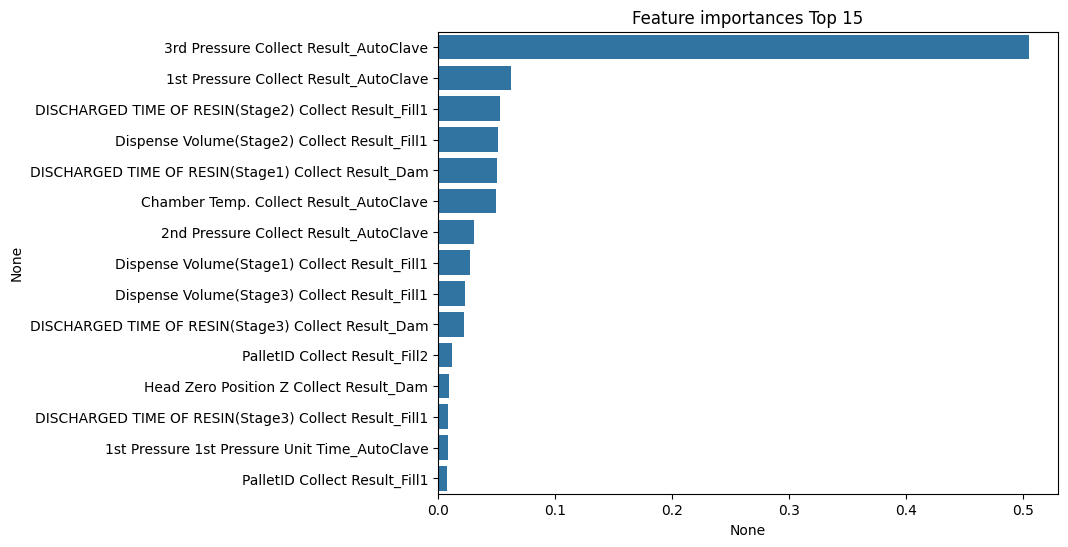

In [22]:
# feature_importances_ 속성을 이용해 변수 중요도 시각화하기
ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 15')
sns.barplot(x = ftr_top15, y = ftr_top15.index)
plt.show()

In [23]:
from sklearn.metrics import f1_score
# Calculate the F1-score using the true labels (y_val) and predicted labels (gb_pred)
f1 = f1_score(y_val, gb_pred, pos_label='AbNormal')  # Assuming 'AbNormal' is the positive class
print(f1)


0.9076140697838677


모델 최적화

In [ ]:
# GridSearchCV 수행 시간 측정
start_time = time.time()

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [6, 10],
    'min_samples_leaf': [6, 8, 12],
    'min_samples_split': [8, 16],
    'learning_rate': [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2)
grid_cv.fit(X_train, y_train)

print('최적의 파라미터 :',grid_cv.best_params_)
print('최고의 예측 정확도 :{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

KeyboardInterrupt: 

###모델 학습

In [24]:
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

train_x = df_train[features]
train_y = df_train["target"]

gb_clf.fit(train_x, train_y)

GradientBoostingClassifier(random_state=0)

#4. 제출하기

###테스트 데이터 예측

테스트 데이터 불러오기

In [25]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"),encoding='latin-1')

In [26]:
df_test_x = test_data[features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

In [27]:
# Add this code block after the code in ipython-input-15-ee6b5efb67e1

# Identify columns with string values
str_cols = df_test_x.select_dtypes(include=['object']).columns

# Iterate through string columns and convert non-numerical values to numerical representations
for col in str_cols:
    unique_vals = df_test_x[col].unique()
    mapping = {val: i for i, val in enumerate(unique_vals)}
    df_test_x[col] = df_test_x[col].map(mapping)

# Get missing columns
missing_cols = set(gb_clf.feature_names_in_) - set(df_test_x.columns)

# Add missing columns to df_test_x and fill with 0
for col in missing_cols:
    df_test_x[col] = 0

# Reorder columns to match training data
df_test_x = df_test_x[gb_clf.feature_names_in_]

test_pred = gb_clf.predict(df_test_x)

###제출 파일 작성

In [29]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv(os.path.join(ROOT_DIR,"submission.csv"),encoding='latin-1')
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission_0826_2.csv", index=False)